In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 스케일링

대상 : Numerical한 변수 전체

Scaler : MinMaxScaler

In [3]:
df = pd.read_excel('./feature_preprocessed.xlsx', engine='openpyxl')
df.head()

,price,author,year,genre,source,date,area,base_charcoal,base_paper,base_fiber,...,mate_collage,mate_engrave,mate_crayon,mate_enamel,mate_oilpastel,online,KOSPI_Close,WTI_Close,rate_Close,estate_rate
0,900000,0,1968,1,2,2021-06-30,4507,0,1,0,...,0,0,0,0,0,1,3296.68,73.47,"1,130.48",116.6
1,850000,0,2015,1,1,2021-06-23,7270,0,1,0,...,0,0,0,0,0,1,3276.19,73.08,"1,135.85",116.6
2,680000000,0,1969,0,0,2021-06-23,10302,0,0,1,...,0,0,0,0,0,0,3276.19,73.08,"1,135.85",116.6
3,3050000000,0,1971,0,1,2021-06-22,22266,0,0,1,...,0,0,0,0,0,0,3263.88,73.06,"1,133.57",116.6
4,72000000,0,1968,0,1,2021-06-22,2169,0,1,0,...,0,0,0,0,0,0,3263.88,73.06,"1,133.57",116.6


In [4]:
df = df.dropna()
df.describe()

,price,author,year,genre,source,area,base_charcoal,base_paper,base_fiber,base_canvas,...,mate_conte,mate_collage,mate_engrave,mate_crayon,mate_enamel,mate_oilpastel,online,KOSPI_Close,WTI_Close,estate_rate
count,7.882000e+03,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,...,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000
mean,4.376575e+07,14.110759,1984.838620,0.461050,1.068637,4202.821111,0.002664,0.656432,0.090459,0.185867,...,0.000761,0.004060,0.000634,0.000254,0.000127,0.002030,0.613042,2415.851610,54.628084,102.197496
std,1.782427e+08,9.808419,210.975973,0.678353,1.632211,6379.387520,0.051551,0.474929,0.286857,0.389024,...,0.027582,0.063592,0.025180,0.015928,0.011264,0.045012,0.487085,407.392155,11.817501,6.437329
min,5.000000e+04,0.000000,19.000000,0.000000,0.000000,68.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1482.460000,-37.630000,95.700000
25%,8.500000e+05,4.000000,1976.000000,0.000000,0.000000,1056.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2108.220000,48.040000,97.100000
50%,3.400000e+06,13.000000,1989.000000,0.000000,0.000000,2411.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2309.030000,56.220000,99.830000
75%,2.500000e+07,23.750000,2003.000000,1.000000,2.000000,4405.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2515.430000,63.220000,104.900000
max,6.550000e+09,29.000000,20112.000000,7.000000,7.000000,80000.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3301.890000,75.300000,116.600000


In [5]:
df = df.replace(',','', regex=True)

In [6]:
df.head()

,price,author,year,genre,source,date,area,base_charcoal,base_paper,base_fiber,...,mate_collage,mate_engrave,mate_crayon,mate_enamel,mate_oilpastel,online,KOSPI_Close,WTI_Close,rate_Close,estate_rate
0,900000,0,1968,1,2,2021-06-30,4507,0,1,0,...,0,0,0,0,0,1,3296.68,73.47,1130.48,116.6
1,850000,0,2015,1,1,2021-06-23,7270,0,1,0,...,0,0,0,0,0,1,3276.19,73.08,1135.85,116.6
2,680000000,0,1969,0,0,2021-06-23,10302,0,0,1,...,0,0,0,0,0,0,3276.19,73.08,1135.85,116.6
3,3050000000,0,1971,0,1,2021-06-22,22266,0,0,1,...,0,0,0,0,0,0,3263.88,73.06,1133.57,116.6
4,72000000,0,1968,0,1,2021-06-22,2169,0,1,0,...,0,0,0,0,0,0,3263.88,73.06,1133.57,116.6


In [7]:
df['rate_Close']=df['rate_Close'].astype(float)

In [8]:
df.isnull().sum()

price                        0
author                       0
year                         0
genre                        0
source                       0
date                         0
area                         0
base_charcoal                0
base_paper                   0
base_fiber                   0
base_canvas                  0
base_hardboard               0
base_hanji                   0
base_ceramic                 0
base_terracotta              0
base_masonite                0
base_wood                    0
base_leaf                    0
base_silverpaper             0
base_metal                   0
mate_gouache                 0
mate_maca                    0
mate_magic                   0
mate_signpen                 0
mate_colorpencil             0
mate_korean_ink              0
mate_korean_ink_and_color    0
mate_watercolor              0
mate_pencil                  0
mate_oil                     0
mate_oil_and_color           0
mate_ink                     0
mate_col

In [9]:
df_corr = df.drop(['mate_maca', 'mate_oil_and_color', 'date'], axis=1)

In [10]:
df_corr.corr()

,price,author,year,genre,source,area,base_charcoal,base_paper,base_fiber,base_canvas,...,mate_collage,mate_engrave,mate_crayon,mate_enamel,mate_oilpastel,online,KOSPI_Close,WTI_Close,rate_Close,estate_rate
price,1.000000,-0.208656,-0.006185,-0.152829,-0.076419,0.333111,-0.008027,-0.242120,0.106339,0.226971,...,-0.005874,0.002691,0.002810,0.088876,-0.010245,-0.264897,0.025002,0.053580,-0.043941,0.010536
author,-0.208656,1.000000,-0.058785,-0.045340,0.233638,-0.072039,-0.036218,0.092148,-0.022277,-0.157101,...,0.038541,-0.018266,-0.006677,-0.008167,-0.009994,0.076406,-0.120419,-0.008012,0.014020,-0.140821
year,-0.006185,-0.058785,1.000000,-0.038460,-0.035151,0.009670,0.000320,-0.010342,0.022382,0.015369,...,-0.000831,-0.003277,-0.000592,-0.001380,0.000823,0.023498,0.039878,0.018320,-0.004398,0.041641
genre,-0.152829,-0.045340,-0.038460,1.000000,0.098966,-0.152279,-0.035131,0.269208,-0.186317,-0.319479,...,-0.037514,-0.017125,-0.010829,-0.007656,0.015057,0.259295,0.069360,-0.056032,0.036165,0.089054
source,-0.076419,0.233638,-0.035151,0.098966,1.000000,-0.107562,-0.008206,0.102283,-0.032504,-0.174964,...,-0.024690,-0.016496,0.009091,-0.000474,-0.003624,0.015377,-0.004592,-0.011527,-0.025970,-0.033965
area,0.333111,-0.072039,0.009670,-0.152279,-0.107562,1.000000,-0.003747,-0.297406,0.148738,0.265304,...,0.030987,-0.016035,-0.008399,-0.005499,-0.018047,-0.280271,0.034630,0.037494,-0.023672,0.028894
base_charcoal,-0.008027,-0.036218,0.000320,-0.035131,-0.008206,-0.003747,1.000000,0.032210,-0.016300,-0.018369,...,-0.003300,-0.001302,-0.000823,-0.000582,-0.002331,0.005691,-0.000759,-0.009506,0.013507,0.021241
base_paper,-0.242120,0.092148,-0.010342,0.269208,0.102283,-0.297406,0.032210,1.000000,-0.368859,-0.640536,...,-0.042038,-0.034825,0.011526,0.008149,0.032628,0.472882,0.020950,-0.035186,0.018832,0.031719
base_fiber,0.106339,-0.022277,0.022382,-0.186317,-0.032504,0.148738,-0.016300,-0.368859,1.000000,-0.149547,...,-0.013179,-0.007945,-0.005024,-0.003552,-0.014223,-0.195338,-0.001014,0.022017,0.013519,0.007024
base_canvas,0.226971,-0.157101,0.015369,-0.319479,-0.174964,0.265304,-0.018369,-0.640536,-0.149547,1.000000,...,0.036172,-0.012038,-0.007612,-0.005382,-0.021549,-0.355648,-0.022354,0.038381,-0.026431,-0.033804


C:\Users\good5\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\good5\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\good5\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\good5\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\good5\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 55176 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\good5\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53944 missing from c

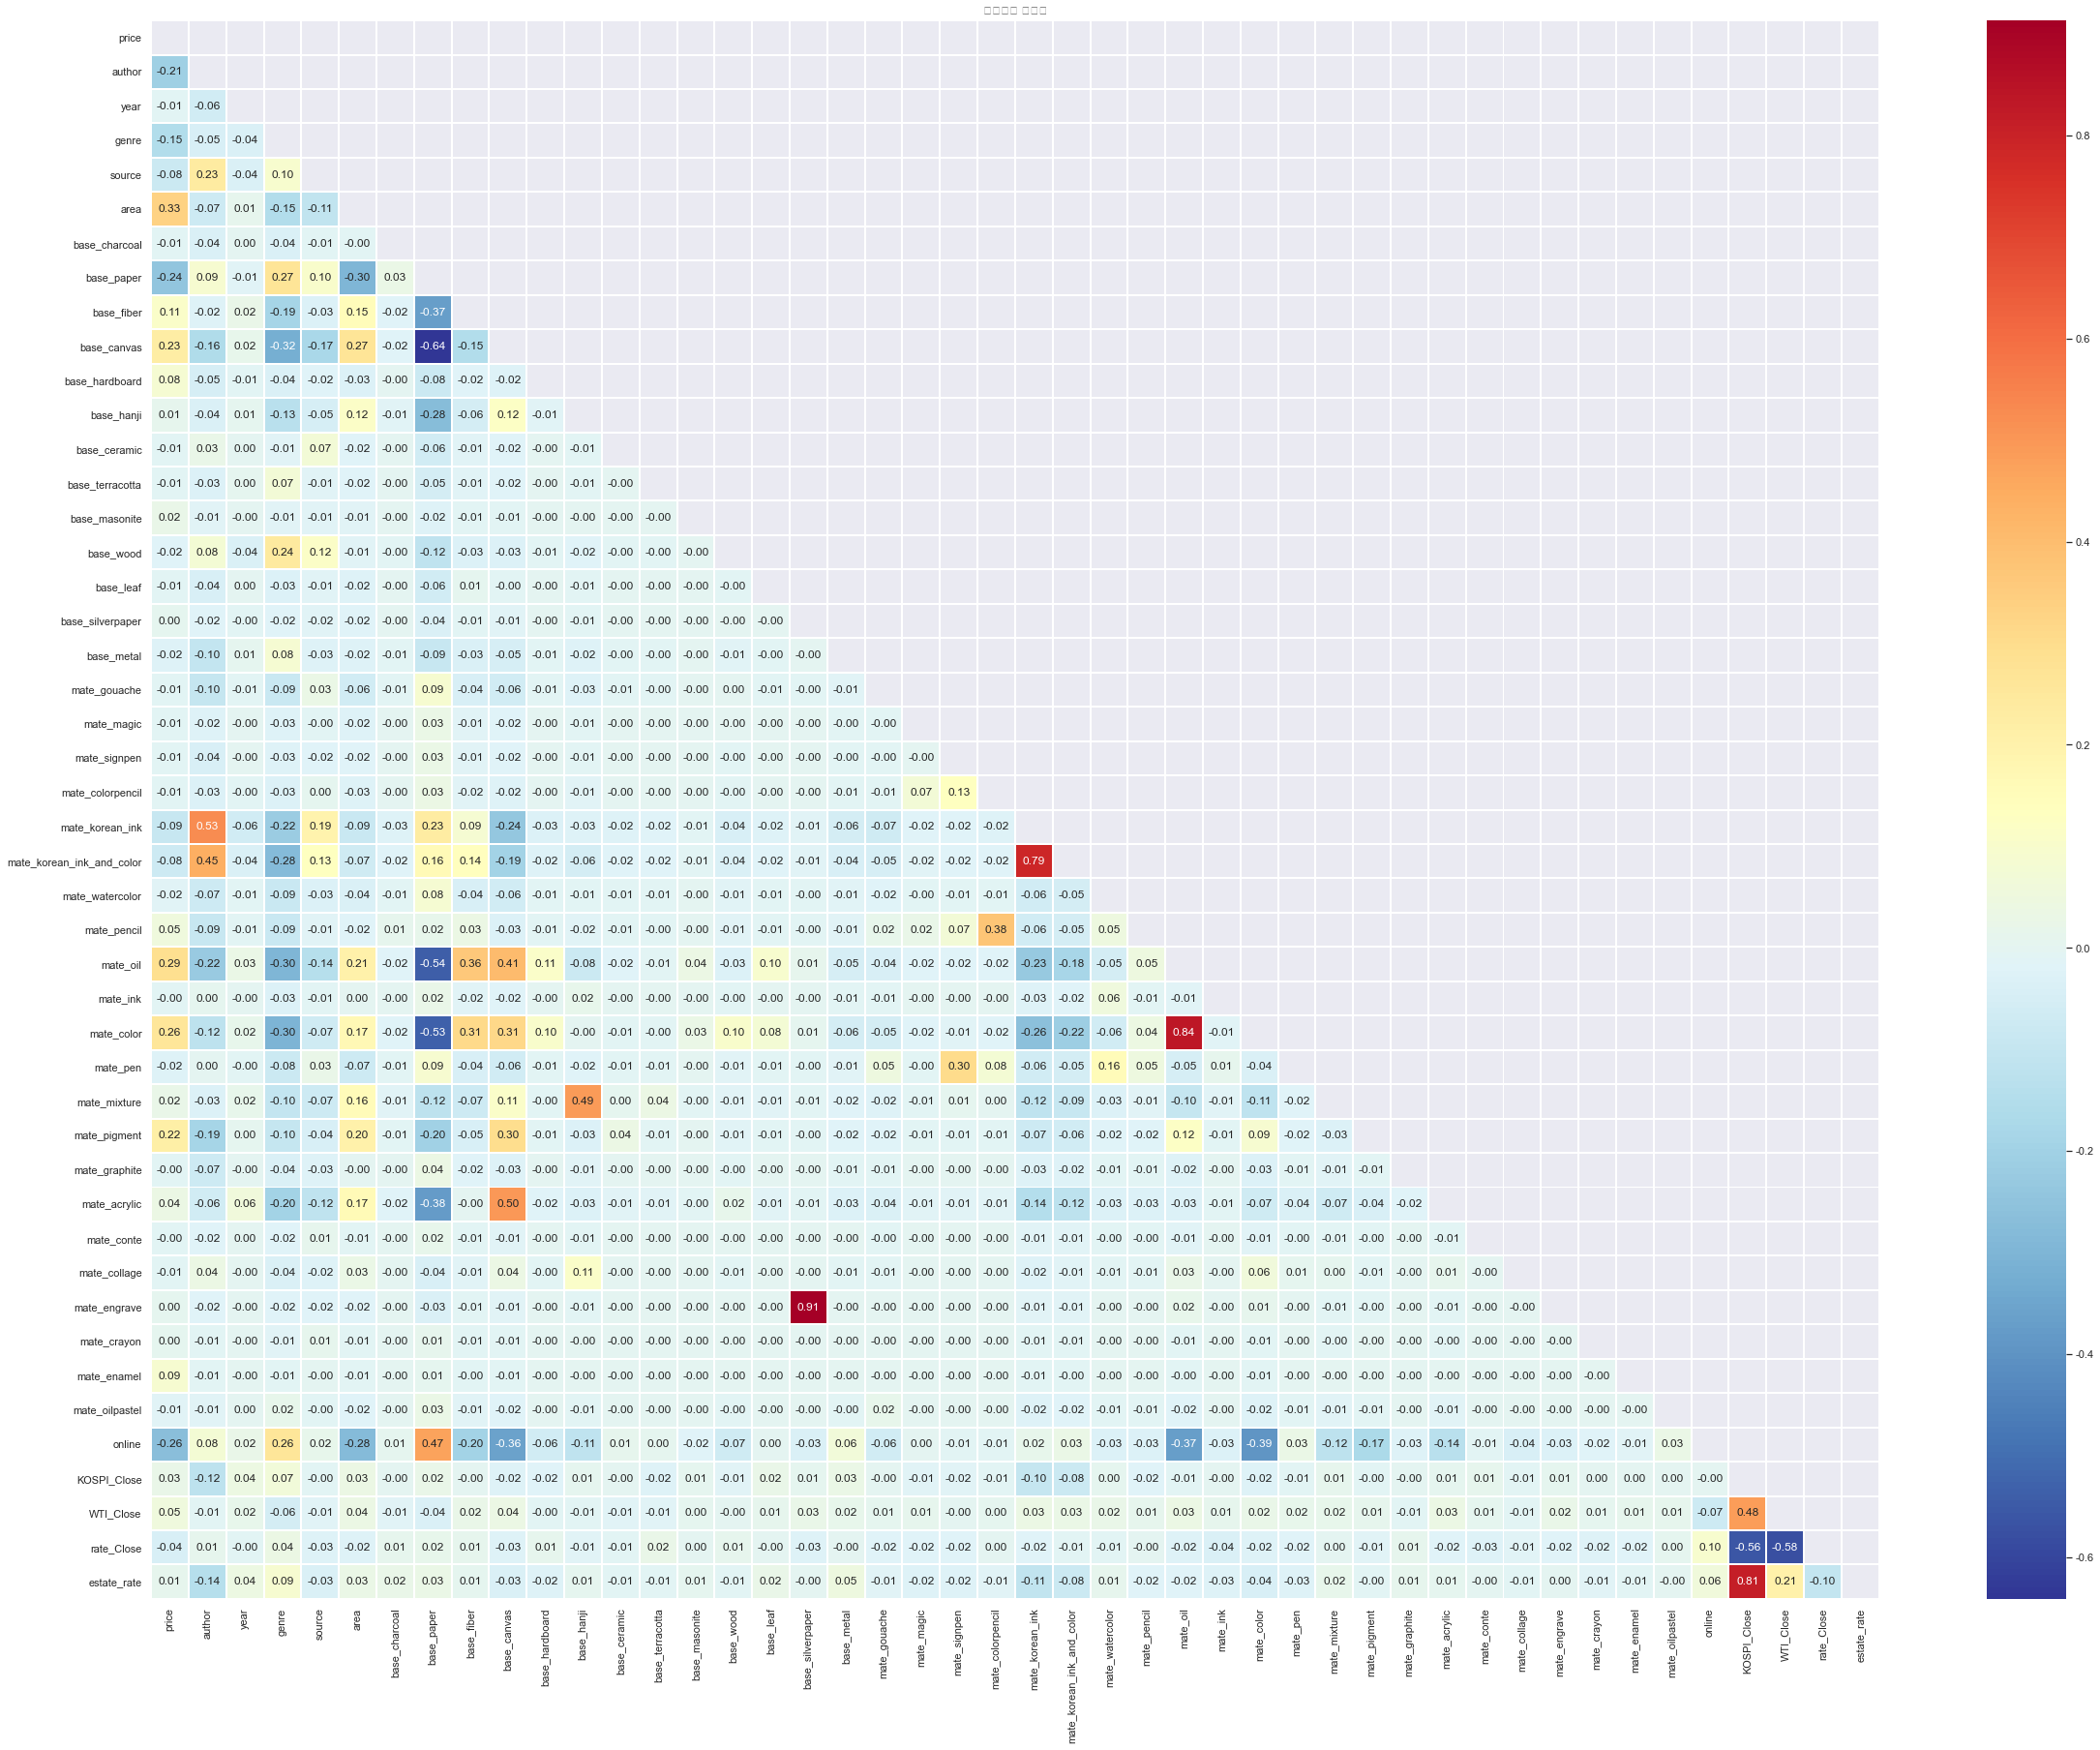

In [11]:
corr = df_corr.corr()

sns.set(rc = {'figure.figsize':(40,30)})

mask = np.zeros_like(corr, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data = corr,    # 'corr' = 상관계수 테이블
            annot = True,  # 히트맵에 값 표시
            mask=mask,   # 히트맵 형태. 여기서는 위에서 정의한 삼각형 형태
            fmt = '.2f',   # 값 표시 방식. 소숫점 2번째자리까지 
            linewidths = 1.,  # 경계면 실선 구분 여부
            cmap = 'RdYlBu_r')  # 사용할 색 지정 ('python colormap 검색')
plt.title('상관계수 히트맵')
plt.show()

In [12]:
corr.price.abs().sort_values(ascending=False)

price                        1.000000
area                         0.333111
mate_oil                     0.292644
online                       0.264897
mate_color                   0.258344
base_paper                   0.242120
base_canvas                  0.226971
mate_pigment                 0.215245
author                       0.208656
genre                        0.152829
base_fiber                   0.106339
mate_korean_ink              0.093430
mate_enamel                  0.088876
base_hardboard               0.084637
source                       0.076419
mate_korean_ink_and_color    0.075619
WTI_Close                    0.053580
mate_pencil                  0.052115
rate_Close                   0.043941
mate_acrylic                 0.035655
KOSPI_Close                  0.025002
mate_mixture                 0.023753
base_metal                   0.023517
mate_pen                     0.023281
base_masonite                0.022904
base_wood                    0.018370
mate_waterco

In [13]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(df_corr)
new_df = min_max_scaler.transform(df_corr)

In [16]:
type(new_df)

numpy.ndarray

# 모델링

분석 방법 : 회귀

분석 기법 : Linear Regression, Ridge, Lasso, Regression Tree, SVR, Random Forest

Train_test_set_split : train 7: test 3

cv = 5

random_seed = 42

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(output, y, test_size=0.3, shuffle=True, random_state=42)

In [14]:
from pycaret.regression import *
reg = setup(new_df, target = 'price', train_size=0.7)

TypeError: data passed must be of type pandas.DataFrame

In [41]:
best = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,25573008.7387,10426507703429418.0000,93588336.8490,0.6472,1.4010,4.9472,0.1690
gbr,Gradient Boosting Regressor,28890879.0922,12132681728961126.0000,102490784.2320,0.5776,1.5684,6.0567,0.2700
rf,Random Forest Regressor,22343176.2059,13050053600386330.0000,106025178.6486,0.5250,0.7752,1.5241,0.8290
et,Extra Trees Regressor,23355036.8142,13166358264124794.0000,107662641.3842,0.5216,0.7279,1.4203,0.8000
ridge,Ridge Regression,49461493.6000,19408068796638824.0000,132997012.8000,0.2819,2.4865,24.2938,0.0180
llar,Lasso Least Angle Regression,49310036.8837,19407503240605980.0000,133001102.8599,0.2818,2.4860,24.2304,0.7160
lasso,Lasso Regression,49312246.8000,19407550394086196.0000,133001265.6000,0.2818,2.4861,24.2327,0.1080
br,Bayesian Ridge,50217198.1040,19537950822361972.0000,133532694.6253,0.2757,2.4900,24.2382,0.0410
lr,Linear Regression,51098870.8000,19628813257906584.0000,133984516.8000,0.2694,2.5281,25.9290,0.7470
omp,Orthogonal Matching Pursuit,48048527.8693,19912610464932408.0000,134852708.3090,0.2612,2.3908,19.1038,0.0190


# 시각화

시각화 방법 : Feature Importance(전체 작가, 분야별 작가, 시대별 작가 등)